In [1]:
#Importações
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%%capture
from google.colab import drive
drive.mount('/Banco_de_Dados')

# Preparação de Dados:
Agora que ja temos um versão mais reduzida do nosso banco de dados podemos começar a fazer nossa exploração:

# 2017

## Inicialização

In [3]:
#Selecionado as Colunas que vamos utilizar:
colunas = ['NU_INSCRICAO','TP_COR_RACA','TP_SEXO','SG_UF_RESIDENCIA','Q001','Q002','Q006','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']

dp_Enem2017 = pd.read_csv("/Banco_de_Dados/MyDrive/Iniciação Cientifica/Banco_de_Dados/microdados_enem_2017/DADOS/MICRODADOS_ENEM_2017.csv",sep=";",encoding="ISO-8859-1",usecols=colunas)

In [4]:
#Memoria do Banco de Dados de 2017
dp_Enem2017.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731341 entries, 0 to 6731340
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   NU_INSCRICAO      int64  
 1   SG_UF_RESIDENCIA  object 
 2   TP_SEXO           object 
 3   TP_COR_RACA       int64  
 4   TP_PRESENCA_CN    float64
 5   TP_PRESENCA_CH    float64
 6   TP_PRESENCA_LC    float64
 7   TP_PRESENCA_MT    float64
 8   NU_NOTA_CN        float64
 9   NU_NOTA_CH        float64
 10  NU_NOTA_LC        float64
 11  NU_NOTA_MT        float64
 12  Q001              object 
 13  Q002              object 
 14  Q006              object 
dtypes: float64(8), int64(2), object(5)
memory usage: 2.3 GB


In [5]:
#Dicionario para converter os Numeros em Texto
dictraca = {
  0	: "Não declarado",
  1	: "Branca",
  2	: "Preta",
  3	: "Parda",
  4	: "Amarela",
  5	: "Indígena" 
}

#Filtros Genericos
notas = ['NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_CN','NU_NOTA_REDACAO']
presenca = ['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT']

In [6]:
# Separando o Banco de Dados apenas para os Presentes:
filtro_presente   = ((dp_Enem2017['TP_PRESENCA_CN'] == 1) & (dp_Enem2017['TP_PRESENCA_CH'] == 1) & (dp_Enem2017['TP_PRESENCA_LC'] == 1) & (dp_Enem2017['TP_PRESENCA_MT'] == 1))
enem_2017   = dp_Enem2017.loc[filtro_presente]
enem_2017 = enem_2017.drop(columns=['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT'])
enem_2017 = enem_2017.reset_index()
enem_2017 = enem_2017.drop(columns=['index'])
enem_2017.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q001,Q002,Q006
0,170003336736,SP,F,1,445.4,589.0,621.5,465.5,E,D,D
1,170001663645,SC,F,1,604.0,610.4,563.9,591.2,E,D,D
2,170001663646,AL,M,3,482.1,569.2,570.8,584.6,A,B,C
3,170001663647,RS,F,1,558.8,594.9,522.8,578.5,F,F,J
4,170003334115,PR,M,2,625.9,636.8,588.3,607.5,C,D,D


### Dicionarios:

In [7]:
#Sexo
dic_Sexo = {
    'F' : 1,
    'M' : 0,
}

In [8]:
#Salario Equivalente
dic_SalarioMin = {   
    'A'	: 0.0, # "Nenhuma renda.",
    'B'	: 1.0, # "Até R$ 937,00.",
    'C'	: 1.5, # "R$ 0.937,01 - R$ 1.405,50.",
    'D'	: 2.0,# "R$ 1.405,51 - R$ 1.874,00.",
    'E'	: 2.5,# "R$ 1.874,01 - R$ 2.342,50.",
    'F'	: 3.0,# "R$ 2.342,51 - R$ 2.811,00.",
    'G'	: 4.0,# "R$ 2.811,01 - R$ 3.748,00.",
    'H'	: 5.0,# "R$ 3.748,01 - R$ 4.685,00.",
    'I'	: 6.0,# "R$ 4.685,01 - R$ 5.622,00.",
    'J'	: 7.0,# "R$ 5.622,01 - R$ 6.559,00.",
    'K'	: 8.0,# "R$ 6.559,01 - R$ 7.496,00.",
    'L'	: 9.0,# "R$ 7.496,01 - R$ 8.433,00.",
    'M'	: 10.0,# "R$ 8.433,01 - R$ 9.370,00.",
    'N'	: 12.0,# "R$ 9.370,01 - R$ 11.244,00.",
    'O'	: 15.0,# "R$ 11.244,01 - R$ 14.055,00.",
    'P'	: 20.0,# "R$ 14.055,01 - R$ 18.740,00.",
    'Q'	: 24.0,# "Mais de R$ 18.740,00.",
}

In [9]:
#montando os Dicionarios para o Pai e a Mãe
dic_Escolarida_pai = {
    'A'	: 0, #"P-Nenhuma",
    'B'	: 1, #"P-Sem Fundamental",
    'C'	: 2, #"P-Fundamental I",
    'D'	: 3, #"P-Fundamental II",
    'E'	: 4, #"P-Medio",
    'F'	: 5, #"P-Faculdade",
    'G'	: 6, #"P-Posgraduação",
    'H'	: 7, #"P-Não sei.",
}

dic_Escolarida_mae = {
    'A'	: 0, #"M-Nenhuma",
    'B'	: 1, #"M-Sem Fundamental",
    'C'	: 2, #"M-Fundamental I",
    'D'	: 3, #"M-Fundamental II",
    'E'	: 4, #"M-Medio",
    'F'	: 5, #"M-Faculdade",
    'G'	: 6, #"M-Posgraduação",
    'H'	: 7, #"M-Não sei.",
}

In [10]:
#Regiao
dic_Regiao = { 
 'AC' : 1,#'Norte',
 'AL' : 2,#'Nordeste',
 'AP' : 1,#'Norte',
 'AM' : 1,#'Norte',
 'BA' : 2,#'Nordeste',
 'CE' : 2,#'Nordeste',
 'DF' : 3,#'Centro Oeste',
 'ES' : 4,#'Sudeste',
 'GO' : 3,#'Centro Oeste',
 'MA' : 2,#'Nordeste',
 'MT' : 3,#'Centro Oeste',
 'MS' : 3,#'Centro Oeste',
 'MG' : 4,#'Sudeste',
 'PA' : 1,#'Norte',
 'PB' : 2,#'Nordeste',
 'PR' : 5,#'Sul',
 'PE' : 2,#'Nordeste',
 'PI' : 2,#'Nordeste',
 'RJ' : 4,#'Sudeste',
 'RN' : 2,#'Nordeste',
 'RS' : 5,#'Sul',
 'RO' : 1,#'Norte',
 'RR' : 1,#'Norte',
 'SC' : 5,#'Sul',
 'SP' : 4,#'Sudeste',
 'SE' : 2,#'Nordeste',
 'TO' : 1,#'Norte',
}

In [11]:
#Raça
dic_Raca = {
  0	: "Não declarado",
  1	: "Branca",
  2	: "Preta",
  3	: "Parda",
  4	: "Amarela",
  5	: "Indígena" 
}


In [12]:
#Criação e Modificação de Novas Colunas Baseados no Dicionario 

enem_2017['EscolMae'] = [dic_Escolarida_pai[valor] for valor in enem_2017['Q002']]
enem_2017['EscolPai'] = [dic_Escolarida_mae[valor] for valor in enem_2017['Q001']]
enem_2017['Raça_Cor'] = [dic_Raca[valor] for valor in enem_2017['TP_COR_RACA']]
enem_2017['Regiao'] = [dic_Regiao[valor] for valor in enem_2017['SG_UF_RESIDENCIA']]
enem_2017['Sexo'] = [dic_Sexo[valor] for valor in enem_2017['TP_SEXO']]
enem_2017.dropna(inplace=True)

## Remoção e Validação 

In [13]:
#Por medidas de segurança vamos crir uma copia do Banco de Dados para poder Fazer umas analises

Seguranca_ENEM = enem_2017

### Raça - Não Declarado

In [14]:
# Não declarado
filtro = ['NU_INSCRICAO', 'Raça_Cor']
countagem = enem_2017.filter(filtro).groupby(['Raça_Cor']).count().sort_values(by=['Raça_Cor'],ascending=False)
countagem.head(7)
total = sum([countagem['NU_INSCRICAO'][i] for i in range(6)])
countagem['Porcentagem'] = (countagem['NU_INSCRICAO'] / total)  * 100
countagem.head(6)

,NU_INSCRICAO,Porcentagem
Raça_Cor,,
Preta,557769,12.599955
Parda,2039253,46.066554
Não declarado,82511,1.863917
Indígena,25819,0.583249
Branca,1619098,36.575287
Amarela,102304,2.311039


Como não Declarado representa menos de 2 porcento da Nota podemos remover essa linhas da Nossa Analise

In [15]:
nao_declarado = enem_2017[(enem_2017['TP_COR_RACA'] == 0)].index
seguranca = enem_2017.drop(nao_declarado) 
seguranca.filter(filtro).groupby(['Raça_Cor']).count().sort_values(by=['Raça_Cor'],ascending=False)
enem_2017 = seguranca

### Escolaridade - Não Sei [Pai]

In [16]:
filtro = ['NU_INSCRICAO', 'Q001']
countagem = enem_2017.filter(filtro).groupby(['Q001']).count().sort_values(by=['Q001'],ascending='True')
total_pai = sum([countagem['NU_INSCRICAO'][i] for i in range(8)])
countagem['Porcentagem_pai'] = (countagem['NU_INSCRICAO'] / total_pai)  * 100
countagem

,NU_INSCRICAO,Porcentagem_pai
Q001,,
A,231929,5.338767
B,935176,21.526788
C,637028,14.663729
D,536589,12.351726
E,1119292,25.764949
F,319126,7.345952
G,185746,4.275682
H,379357,8.732407


Mesmo perdendo 8% dos dados em relação aos Pais precisamos remover pois essa informação não nos informa nada

In [17]:
nao_informado = enem_2017[(enem_2017['Q001'] == 'H')].index
seguranca = enem_2017.drop(nao_informado) 
seguranca.filter(filtro).groupby(['Q001']).count().sort_values(by=['Q001'],ascending=False)
enem_2017 = seguranca

### Escolaridade - Nâo Sei [Mãe]

In [18]:
filtro = ['NU_INSCRICAO', 'Q002']
countagem = enem_2017.filter(filtro).groupby(['Q002']).count().sort_values(by=['Q002'],ascending='True')
total_mae = sum([countagem['NU_INSCRICAO'][i] for i in range(8)])
countagem['Porcentagem_mae'] = (countagem['NU_INSCRICAO'] / total_mae)  * 100
countagem

,NU_INSCRICAO,Porcentagem_mae
Q002,,
A,155638,3.925409
B,667386,16.832413
C,563592,14.214583
D,551157,13.900955
E,1271664,32.073154
F,404541,10.203093
G,310751,7.837577
H,40157,1.012816


As 1% dos Dados é valida a perda ja que não nos informa muita coisa

In [19]:
nao_informado = enem_2017[(enem_2017['Q002'] == 'H')].index
seguranca = enem_2017.drop(nao_informado) 
seguranca.filter(filtro).groupby(['Q002']).count().sort_values(by=['Q002'],ascending=False)
enem_2017 = seguranca

### Renda Mensal - Acima de 20 Salarios Minimos

In [20]:
#filtro = ['NU_INSCRICAO', 'Q006']
#countagem = enem_2017.filter(filtro).groupby(['Q006']).count().sort_values(by=['Q006'],ascending='True')
#total_salario = sum([countagem['NU_INSCRICAO'][i] for i in range(17)])
#countagem['Porcentagem'] = (countagem['NU_INSCRICAO'] / total_salario)  * 100
#countagem

As 1% dos Dados é valida a perda ja que não nos informa muita coisa

In [21]:
#Removendo Q
#nao_informado = enem_2017[(enem_2017['Q006'] == 'Q')].index
#seguranca = enem_2017.drop(nao_informado) 
#seguranca.filter(filtro).groupby(['Q006']).count().sort_values(by=['Q006'])
#enem_2017 = seguranca

In [22]:
#Removendo P
#nao_informado = enem_2017[(enem_2017['Q006'] == 'P')].index
#seguranca = enem_2017.drop(nao_informado) 
#seguranca.filter(filtro).groupby(['Q006']).count().sort_values(by=['Q006'])
#enem_2017 = seguranca

In [23]:
#Removendo O
#nao_informado = enem_2017[(enem_2017['Q006'] == 'O')].index
#seguranca = enem_2017.drop(nao_informado) 
#seguranca.filter(filtro).groupby(['Q006']).count().sort_values(by=['Q006'])
#enem_2017 = seguranca

In [24]:
#Removendo N
#nao_informado = enem_2017[(enem_2017['Q006'] == 'N')].index
#seguranca = enem_2017.drop(nao_informado) 
#seguranca.filter(filtro).groupby(['Q006']).count().sort_values(by=['Q006'])
#enem_2017 = seguranca

## Resultado Final

In [25]:
antes = Seguranca_ENEM.shape[0]
depois = enem_2017.shape[0]
dif = antes - depois

print('Antes .........: ' + str(antes))
print('Depois: .......: ' + str(depois))
print('Dados Excluidos: ' + str(dif))
print('Porcentagem ...: ' + str((dif/antes)*100) )

Antes .........: 4426754
Depois: .......: 3924729
Dados Excluidos: 502025
Porcentagem ...: 11.340702465056788


In [26]:
enem_2017 = enem_2017.reset_index()
enem_2017 = enem_2017.drop(columns=['index'])
enem_2017.head(10)

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q001,Q002,Q006,EscolMae,EscolPai,Raça_Cor,Regiao,Sexo
0,170003336736,SP,F,1,445.4,589.0,621.5,465.5,E,D,D,3,4,Branca,4,1
1,170001663645,SC,F,1,604.0,610.4,563.9,591.2,E,D,D,3,4,Branca,5,1
2,170001663646,AL,M,3,482.1,569.2,570.8,584.6,A,B,C,1,0,Parda,2,0
3,170001663647,RS,F,1,558.8,594.9,522.8,578.5,F,F,J,5,5,Branca,5,1
4,170003334115,PR,M,2,625.9,636.8,588.3,607.5,C,D,D,3,2,Preta,5,0
5,170001669940,PE,M,3,533.8,427.6,320.7,479.0,A,E,B,4,0,Parda,2,0
6,170001665201,MT,F,3,445.7,458.0,462.5,430.1,B,E,B,4,1,Parda,3,1
7,170001665202,CE,M,1,501.8,566.6,544.9,645.1,B,E,E,4,1,Branca,2,0
8,170001665203,CE,M,2,462.5,523.6,571.5,517.6,B,B,C,1,1,Preta,2,0
9,170003336360,PI,M,3,674.8,682.7,626.4,795.0,F,E,Q,4,5,Parda,2,0


## Analise de Comportamento

## Prepração dos Dados

### Categorizando e Agrupando

In [27]:
# Media do Enem
filtro = ['NU_INSCRICAO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']
notas = enem_2017[filtro]
media = [ 
    (notas['NU_NOTA_CH'][i] + notas['NU_NOTA_CN'][i] + notas['NU_NOTA_LC'][i] + notas['NU_NOTA_MT'][i])/4 for i in range(notas.shape[0])
    ]
enem_2017['Media_Notas'] = media

In [28]:
enem_2017 = enem_2017.drop(columns=['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT'])
enem_2017 = enem_2017.reset_index()
enem_2017 = enem_2017.drop(columns=['index'])
enem_2017.head(10)

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,Q001,Q002,Q006,EscolMae,EscolPai,Raça_Cor,Regiao,Sexo,Media_Notas
0,170003336736,SP,F,1,E,D,D,3,4,Branca,4,1,530.350
1,170001663645,SC,F,1,E,D,D,3,4,Branca,5,1,592.375
2,170001663646,AL,M,3,A,B,C,1,0,Parda,2,0,551.675
3,170001663647,RS,F,1,F,F,J,5,5,Branca,5,1,563.750
4,170003334115,PR,M,2,C,D,D,3,2,Preta,5,0,614.625
5,170001669940,PE,M,3,A,E,B,4,0,Parda,2,0,440.275
6,170001665201,MT,F,3,B,E,B,4,1,Parda,3,1,449.075
7,170001665202,CE,M,1,B,E,E,4,1,Branca,2,0,564.600
8,170001665203,CE,M,2,B,B,C,1,1,Preta,2,0,518.800
9,170003336360,PI,M,3,F,E,Q,4,5,Parda,2,0,694.725


In [29]:
filtro = ['Q006']
notas = enem_2017[filtro]
media = [dic_SalarioMin[(notas['Q006'][i])] for i in range(notas.shape[0])]
enem_2017['Sal.Minimo'] = media

In [30]:
enem_2017.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,Q001,Q002,Q006,EscolMae,EscolPai,Raça_Cor,Regiao,Sexo,Media_Notas,Sal.Minimo
0,170003336736,SP,F,1,E,D,D,3,4,Branca,4,1,530.350,2.0
1,170001663645,SC,F,1,E,D,D,3,4,Branca,5,1,592.375,2.0
2,170001663646,AL,M,3,A,B,C,1,0,Parda,2,0,551.675,1.5
3,170001663647,RS,F,1,F,F,J,5,5,Branca,5,1,563.750,7.0
4,170003334115,PR,M,2,C,D,D,3,2,Preta,5,0,614.625,2.0


In [31]:
enem_2017.corr()['Media_Notas'].sort_values(ascending=False)

Media_Notas     1.000000
Sal.Minimo      0.440016
EscolPai        0.373730
EscolMae        0.353100
Regiao          0.224283
NU_INSCRICAO   -0.035333
Sexo           -0.141816
TP_COR_RACA    -0.210482
Name: Media_Notas, dtype: float64

In [32]:
def categorical(valor):
  if(0   <= valor < 300): return 0
  elif(300 <= valor < 350): return 1
  elif(350 <= valor < 400): return 2
  elif(400 <= valor < 450): return 3
  elif(450 <= valor < 500): return 4
  elif(500 <= valor < 550): return 5
  elif(500 <= valor < 600): return 6
  elif(600 <= valor < 650): return 7
  elif(650 <= valor < 700): return 8
  elif(700 <= valor < 750): return 9
  elif(750 <= valor < 800): return 10
  elif(800 <= valor < 850): return 11
  elif(850 <= valor < 900): return 12
  elif(900 <= valor < 950): return 13
  elif(950 <= valor <= 1000): return 14

In [33]:
categorical = [ 
    categorical(enem_2017['Media_Notas'][i]) for i in range(enem_2017.shape[0])
    ]
enem_2017['Categoria_Nota'] = categorical

In [34]:
enem_2017.filter(['NU_INSCRICAO','Categoria_Nota']).groupby(['Categoria_Nota']).count().sort_values(by=['Categoria_Nota'],ascending=False)

,NU_INSCRICAO
Categoria_Nota,
11,39
10,2727
9,30177
8,130803
7,330467
6,665363
5,1009079
4,1119172
3,593435


In [35]:
enem_2017.corr()['Categoria_Nota'].sort_values(ascending=False)

Categoria_Nota    1.000000
Media_Notas       0.977962
Sal.Minimo        0.430749
EscolPai          0.365919
EscolMae          0.345746
Regiao            0.219465
NU_INSCRICAO     -0.034736
Sexo             -0.138909
TP_COR_RACA      -0.206196
Name: Categoria_Nota, dtype: float64

## Machine Learning - Random Forest

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split

dp = enem_2017.drop(columns=['Raça_Cor','Q001','Q002','Q006','SG_UF_RESIDENCIA','NU_INSCRICAO','TP_SEXO','Categoria_Nota'])

x = dp.drop(['Media_Notas'],axis=1)
y = dp['Media_Notas']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [37]:
from sklearn.ensemble import RandomForestRegressor

dt = RandomForestRegressor(n_estimators=150,random_state=0, n_jobs=-1)
dt.fit(x_train,y_train)

y_pred_dt = dt.predict(x_test)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test,y_pred_dt)
mae = mean_squared_error(y_test,y_pred_dt)

print("R² : " + str(r2))
print("MSE: " + str(np.sqrt(mae)))

R² : 0.3010690260368868
MSE: 56.70925704369142


### Single Feature Dependence Plot

In [39]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
pip install PDPbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
from sklearn.pipeline import make_pipeline
from pdpbox import pdp, get_dataset, info_plots

In [42]:
x_train.columns

Index(['TP_COR_RACA', 'EscolMae', 'EscolPai', 'Regiao', 'Sexo', 'Sal.Minimo'], dtype='object')

In [43]:
pdp_raca = pdp.pdp_isolate(model=dt,dataset=x,model_features=x.columns, feature="TP_COR_RACA")

In [52]:
plot_params = {
    # plot title and subtitle
    'title': '', #% feature_name,
    'subtitle': "", #% n_grids,
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    'font_family': 'Arial',
    # matplotlib color map for ICE lines
    'line_cmap': 'Black',
    'xticks_rotation': 0,
    # pdp line color, highlight color and line width
    'pdp_color': '#1A4E5D',
    'pdp_hl_color': '#FEDC00',
    'pdp_linewidth': 2.5,
    # horizon zero line color and with
    'zero_color': '#E75438',
    'zero_linewidth': 1,
    # pdp std fill color and alpha
    'fill_color': '#66C2D7',
    'fill_alpha': 0.5,
    # marker size for pdp line
    'markersize': 5.5,
}

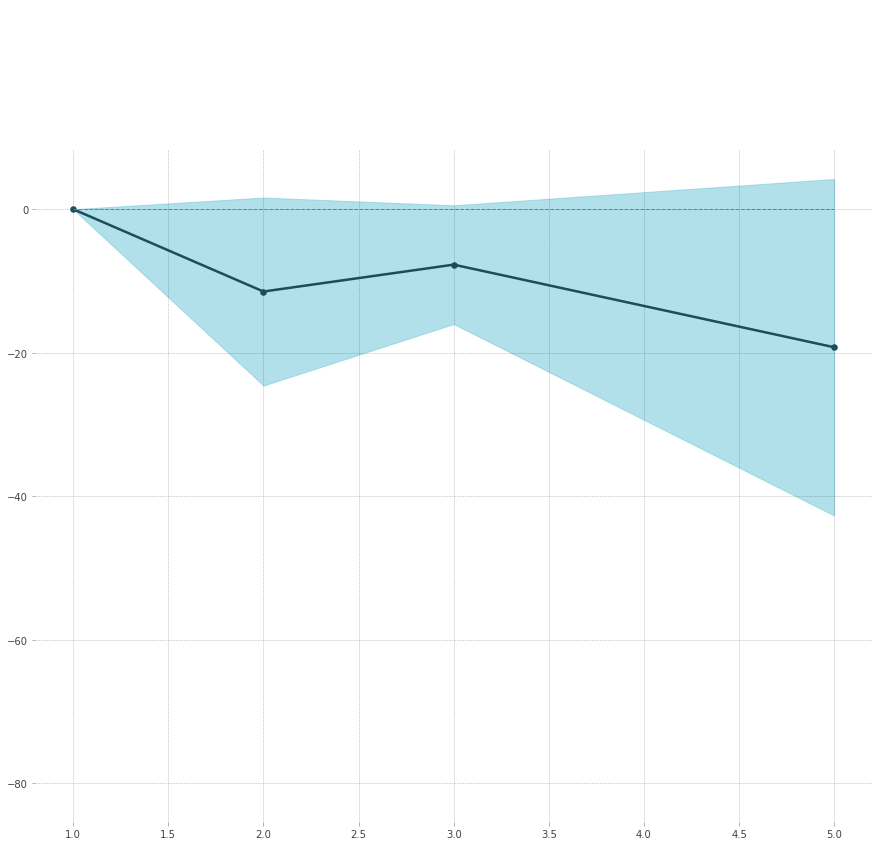

In [61]:
fig, axes = pdp.pdp_plot(pdp_raca,'',figsize=(15,15),plot_params=plot_params)

In [55]:
pdp_escolmae = pdp.pdp_isolate(model=dt, dataset=x,model_features=x.columns, feature="EscolMae")

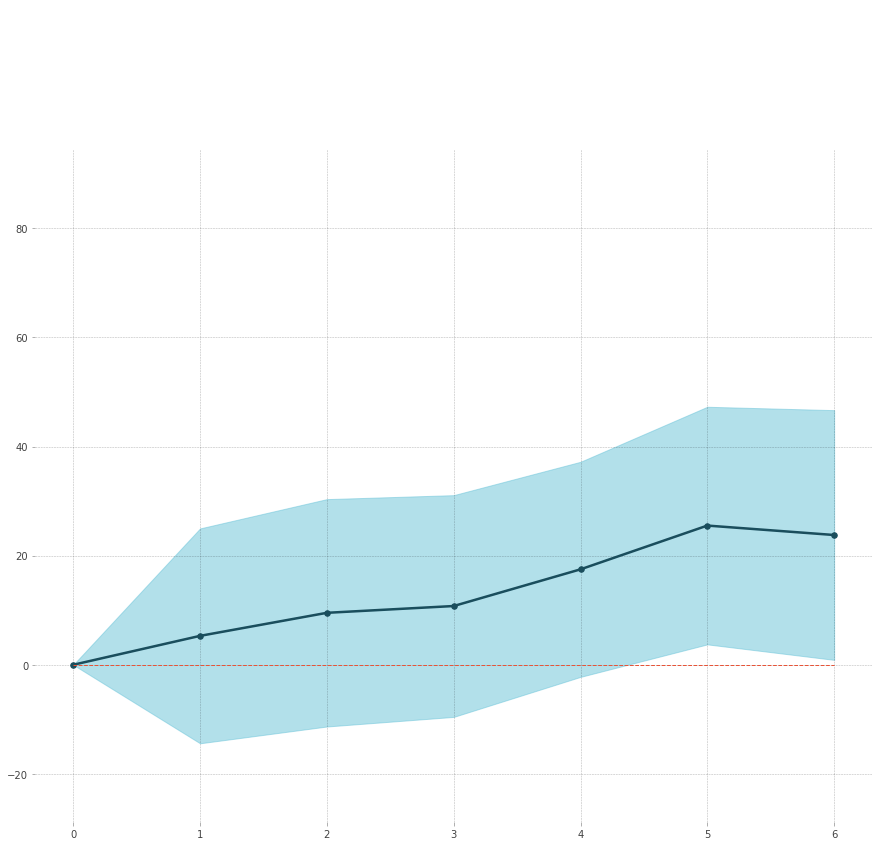

In [60]:
fig, axes = pdp.pdp_plot(pdp_escolmae,' ',figsize=(15,15),plot_params=plot_params)

In [63]:
pdp_escolpai = pdp.pdp_isolate(model=dt, dataset=x,model_features=x.columns, feature="EscolPai")

(<Figure size 1080x1080 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f51b7460f90>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f51b74605d0>})

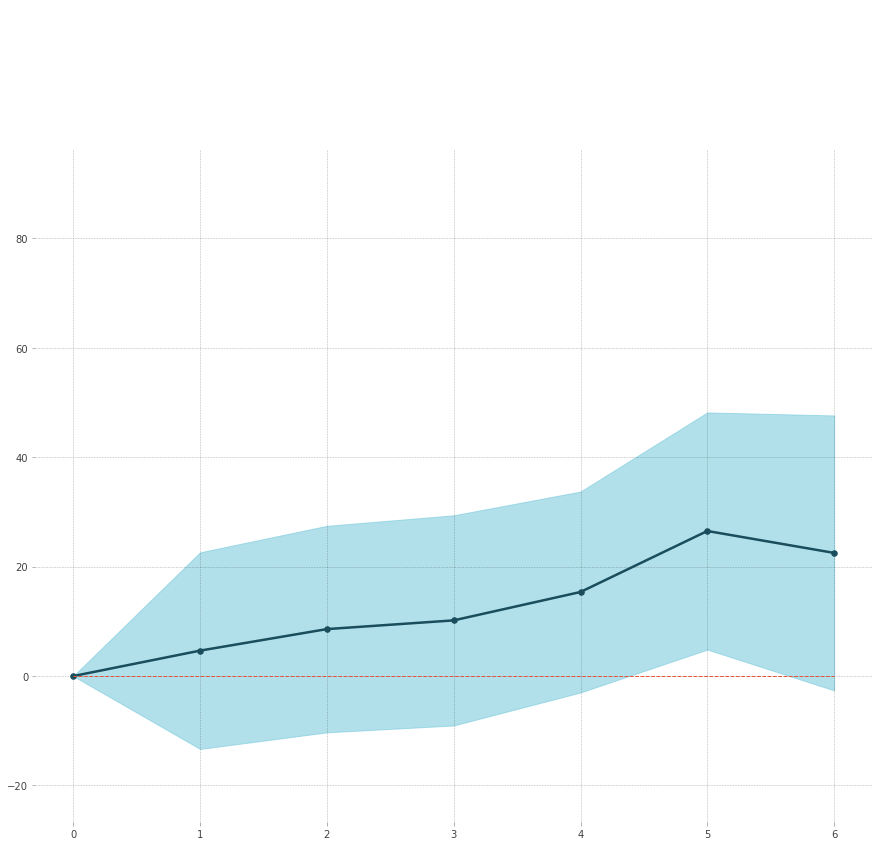

In [64]:
pdp.pdp_plot(pdp_escolpai, '',figsize=(15,15),plot_params=plot_params)

In [65]:
pdp_regiao = pdp.pdp_isolate(model=dt, dataset=x,model_features=x.columns, feature="Regiao")


(<Figure size 1080x1080 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f51b3fa89d0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f51b7460190>})

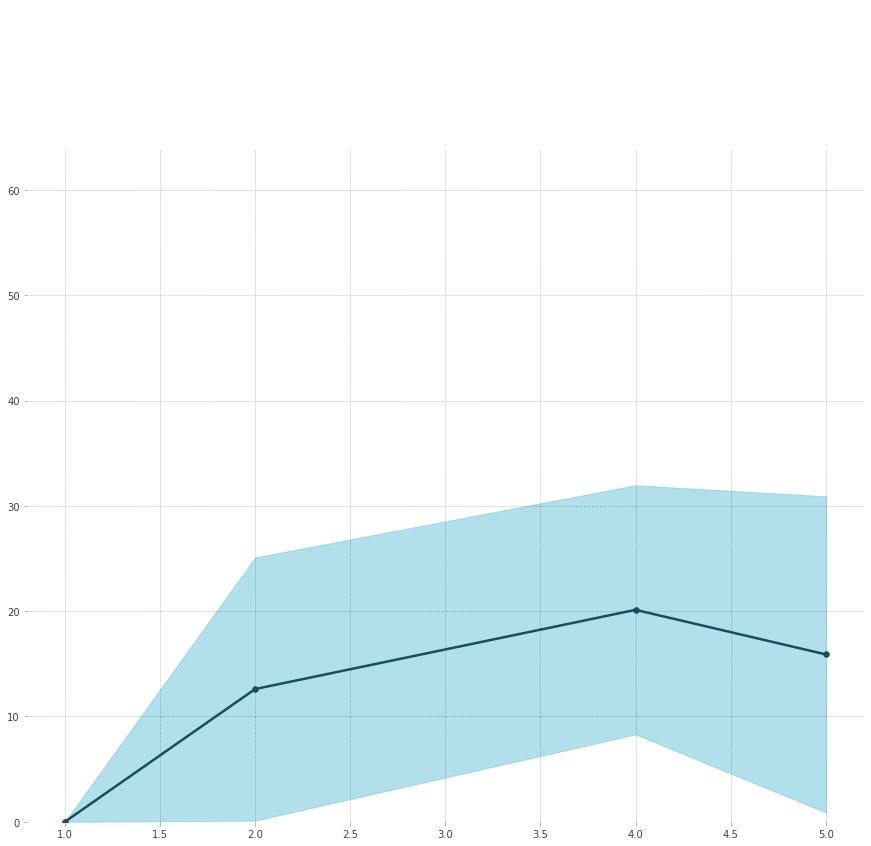

In [66]:
pdp.pdp_plot(pdp_regiao, '',figsize=(15,15),plot_params=plot_params)

In [67]:
pdp_SalMinimo = pdp.pdp_isolate(model=dt, dataset=x,model_features=x.columns, feature="Sal.Minimo")

(<Figure size 1080x1080 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f51b70ffa90>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f51b4624250>})

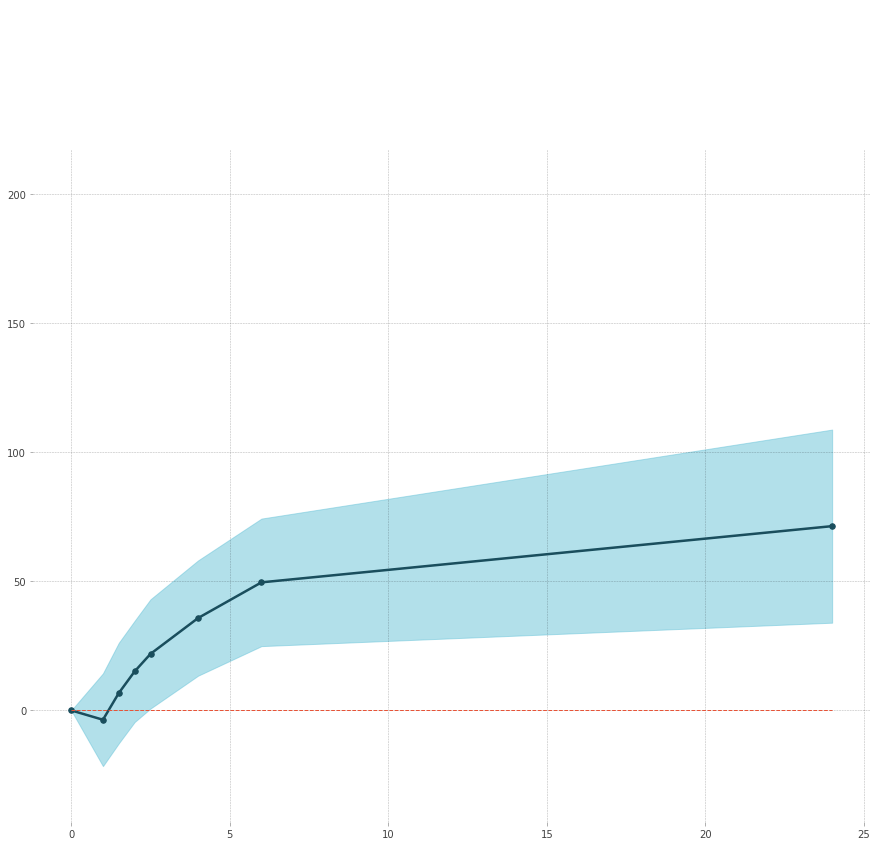

In [68]:
pdp.pdp_plot(pdp_SalMinimo, '',figsize=(15,15),plot_params=plot_params)